# Creating and excecuting MDF models

This is a quick introduction to building MDF graphs and using them in different scenarios. Each of this steps will be followed

1. **[Create a Model containing a Graph](#h1)**
2. **[Adding a State Variable](#h2)**
3. **[Generate a graph image from the model](#h2)**
4. **[Execute the graph & print the output values](#h3)**

## 1. Create a [Model](https://mdf.readthedocs.io/en/latest/api/Specification.html#model) containing a [Graph](https://mdf.readthedocs.io/en/latest/api/Specification.html#graph) <a class="anchor" id="h1"></a>

**We are to build a model that has one or more graphs, for which the graph specifies the structure and process flow of our model.**

**A detailed explaination on how we can build this Graph will be explained in this notebook**

In [21]:
from modeci_mdf.mdf import *

# Create a model containing one graph
mod = Model(id="ABCos")
mod_graph = Graph(id="abcos")
mod.graphs.append(mod_graph)



### 1.1 Create the first [Node](https://mdf.readthedocs.io/en/latest/api/Specification.html#node)

**The first Node A was created here. A parameter was defined to accept our value and an output port was created to**

**pass our information down to the next node**

In [22]:
# Create a node
a_node = Node(id="A", metadata={"color": "0 .8 0"})

# Add a parameter with a specific value
a_node.parameters.append(Parameter(id="level", value=1.0))

# Add an output port
a_node.output_ports.append(OutputPort(id="output", value = "level"))

# Add node to the graph
mod_graph.nodes.append(a_node)

# Print current structure as YAML
print(mod_graph.to_yaml())

abcos:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                level:
                    value: 1.0
            output_ports:
                output:
                    value: level



**The result specified below is being printed in a .yml output format, which can be seen in a serialized format**

.

### 1.2 Create another [Node](https://mdf.readthedocs.io/en/latest/api/Specification.html#node) known as B

**We created another new Node here known as B, this node contains an input Port which obtained information from the** 

**earlier node (A). We also defined our prarameters and functions, the functions used in this node is the**

**linear function equation. When we were done, we passed the information to the output Port for use**




.

In [23]:
b_node = Node(id="B", metadata={"color": ".8 0 0"})
mod_graph.nodes.append(b_node)

# Add an input port
b_node.input_ports.append(InputPort(id="input"))

# Add some parameters
b_node.parameters.append(Parameter(id="slope", value=1.2))
b_node.parameters.append(Parameter(id="intercept", value=3))


# Add a parameter which used the internal parameter as well as the value from the input
p1 = Parameter(
    id="linear_func",
    value="input * slope + intercept",
)
b_node.parameters.append(p1)

# Add an output port
b_node.output_ports.append(OutputPort(id="output", value="linear_func"))

**An edge was created between Nodes A and B to connect our first Node A to the Second Node B. Using this edge,**

**the information from Output Port of A was passed down to the input port of B for use. After the connection we**

**can see the result expressed in a serialized format when printed.**

### 1.3 Create an  [Edge](https://mdf.readthedocs.io/en/latest/api/Specification.html#edge) between the [Nodes](https://mdf.readthedocs.io/en/latest/api/Specification.html#node) A and B

In [24]:
# This helper method just adds an edge connecting the first output port of 
# the pre node to the first input port of the post node
from modeci_mdf.utils import simple_connect

e1 = simple_connect(a_node, b_node, mod_graph)

# Print the current structure
print(mod_graph.to_yaml())

abcos:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                level:
                    value: 1.0
            output_ports:
                output:
                    value: level
        B:
            metadata:
                color: .8 0 0
            input_ports:
                input: {}
            parameters:
                slope:
                    value: 1.2
                intercept:
                    value: 3
                linear_func:
                    value: input * slope + intercept
            output_ports:
                output:
                    value: linear_func
    edges:
        edge_A_B:
            sender: A
            receiver: B
            sender_port: output
            receiver_port: input



### 2.    Adding a State Variable

**In this section, we added a state variable which helps to show us how informations persisted during our nodes**

**execution. We as well have the opportunity to modify this state on any of our node execution or other subsequent** 

**executions.**


In [25]:
the_cos_node = Node(id="cos_node",  metadata={"color": "0 .8 0"})
mod_graph.nodes.append(the_cos_node)
#Add an input port
ip1 = InputPort(id="input_port1")
the_cos_node.input_ports.append(ip1)
the_cos_node.parameters.append(Parameter(id="amp", value=3))
the_cos_node.parameters.append(Parameter(id="duration", value=1.4))

v1 = Parameter(
        id="level", default_initial_value=0, time_derivative="6.283185 * rate / duration"
    )
the_cos_node.parameters.append(v1)

v2 = Parameter(
    id="rate",
    default_initial_value=1,
    time_derivative="-1 * 6.283185 * level / duration",
)
the_cos_node.parameters.append(v2)

op1 = OutputPort(id="out_port", value="amp * level")
the_cos_node.output_ports.append(op1)

mod_graph.nodes.append(the_cos_node)

**When we were done creating our state variable, we created an Edge which connects output port of B to the input Port** 

**of our State Variable Node. After that, we printed the current structure of the graph using the .yaml format**

### 2.1 Create an  [Edge](https://mdf.readthedocs.io/en/latest/api/Specification.html#edge) between the [Nodes](https://mdf.readthedocs.io/en/latest/api/Specification.html#node)

In [26]:
# This helper method just adds an edge connecting the first output port of 
# the pre node to the first input port of the post node
from modeci_mdf.utils import simple_connect

e1 = simple_connect(b_node, the_cos_node,mod_graph)

# Print the current structure
print(mod_graph.to_yaml())


abcos:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                level:
                    value: 1.0
            output_ports:
                output:
                    value: level
        B:
            metadata:
                color: .8 0 0
            input_ports:
                input: {}
            parameters:
                slope:
                    value: 1.2
                intercept:
                    value: 3
                linear_func:
                    value: input * slope + intercept
            output_ports:
                output:
                    value: linear_func
        cos_node:
            metadata:
                color: 0 .8 0
            input_ports:
                input_port1: {}
            parameters:
                amp:
                    value: 3
                duration:
                    value: 1.4
                level:
                    default_initial_value: 0
             

.

Here, we go further to generate our graph image from our Model

## 3. Generate a graph image from the model <a class="anchor" id="h2"></a>

We will use a method on the model to generate an image representing the structure of the graph.


An ABCos Graph Image was generated from the model

Converting MDF graph: abcos to graphviz (level: 3, format: png)
    Node: A
Converting 0 .8 0 to hex color
    Node: B
Converting .8 0 0 to hex color
    Node: cos_node
Converting 0 .8 0 to hex color
    Node: cos_node
Converting 0 .8 0 to hex color
    Edge: edge_A_B connects A to B
    Edge: edge_B_cos_node connects B to cos_node
Written graph image to: ABCos.png


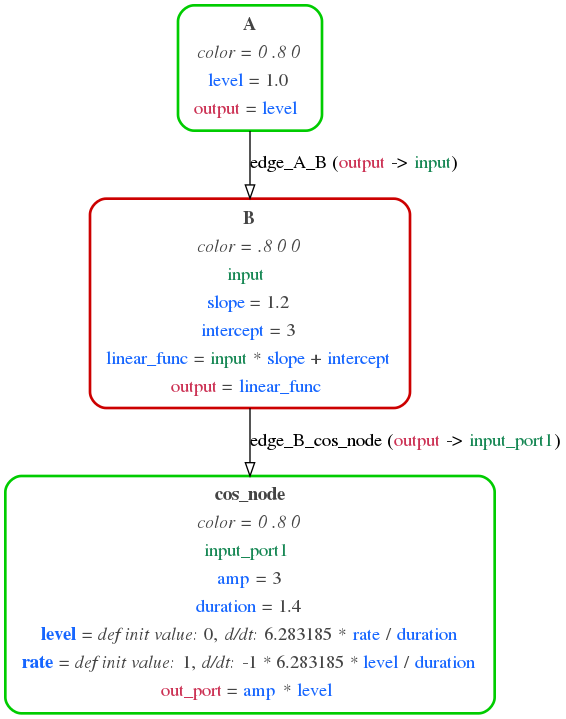

In [27]:
mod.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="ABCos"
    )

from IPython.display import Image
Image(filename="ABCos.png")

## 4. Execute the graph & print the output values <a class="anchor" id="h3"></a>

The Graph is converted to an EvaluableGraph, which can be used to evaluate the current state of the graph's parameters. 

#### 4.1 Execute the graph with the current parameter values 

**By using the EvaluableGraph method, we use each of our Node names(A, B,cos_node),along with the output** 

**name port we created to call the current value result, so we can print out each output result of each nodes**

In [28]:
from modeci_mdf.execution_engine import EvaluableGraph

eg = EvaluableGraph(mod_graph, verbose=False)
eg.evaluate()

print('Output of A: %s'%eg.enodes["A"].evaluable_outputs["output"].curr_value)
print('Output of B: %s'%eg.enodes["B"].evaluable_outputs["output"].curr_value)
print('Output of cos_node: %s'%eg.enodes["cos_node"].evaluable_outputs["out_port"].curr_value)


Init graph: abcos
Evaluating graph: abcos, root nodes: ['A', 'cos_node'], with array format numpy
Output of A: 1
Output of B: 4.2
Output of cos_node: 0


### 4.2 Change a value to a Numpy array & execute the graph again

**Here, The Node result was printed in an Array format**

In [29]:
import numpy as np 
a_node.get_parameter('level').value = np.array([[1,2],[3,4]])
#b_node.get_parameter('linear_func').value = np.array([[1,4],[3,4]])

eg.evaluate()

print('Output of A:\n%s'%eg.enodes["A"].evaluable_outputs["output"].curr_value)
print('Output of B:\n%s'%eg.enodes["B"].evaluable_outputs["output"].curr_value)
print('Output of cos_node:\n%s'%eg.enodes["cos_node"].evaluable_outputs["out_port"].curr_value)

Evaluating graph: abcos, root nodes: ['A', 'cos_node'], with array format numpy
Output of A:
[[1 2]
 [3 4]]
Output of B:
[[4.2 5.4]
 [6.6 7.8]]
Output of cos_node:
0
